# it is a recoomendation project 

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
df=pd.read_csv('D:\MLops-Recommendation-Project\dataset\Sales_Amazon_Cleaned_final.csv')

In [15]:
df.shape

(151809, 18)

In [16]:
df.head(3)

,Unnamed: 0,user_id,product_id,user_name,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price,neg,neu,pos,compound
0,0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Manav,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0,0.032,0.744,0.224,0.9033
1,1,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Manav,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24270.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0,0.032,0.744,0.224,0.9033
2,2,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Manav,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0,0.032,0.744,0.224,0.9033


In [17]:
df.isnull().sum().sum()

8

In [19]:
df.duplicated().sum()

0

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(151801, 18)

In [22]:
df.columns

Index(['Unnamed: 0', 'user_id', 'product_id', 'user_name', 'product_name',
       'discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'category_1', 'category_2', 'rating_score',
       'difference_price', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151801 entries, 0 to 151808
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           151801 non-null  int64  
 1   user_id              151801 non-null  object 
 2   product_id           151801 non-null  object 
 3   user_name            151801 non-null  object 
 4   product_name         151801 non-null  object 
 5   discounted_price     151801 non-null  float64
 6   actual_price         151801 non-null  float64
 7   discount_percentage  151801 non-null  float64
 8   rating               151801 non-null  float64
 9   rating_count         151801 non-null  float64
 10  category_1           151801 non-null  object 
 11  category_2           151801 non-null  object 
 12  rating_score         151801 non-null  object 
 13  difference_price     151801 non-null  float64
 14  neg                  151801 non-null  float64
 15  neu                  1

In [25]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,151801.0,75901.21,43823.10,0.00,37950.00,75900.00,113850.00,151808.00
discounted_price,151801.0,2104.15,5356.81,39.00,215.00,474.00,1499.00,77990.00
actual_price,151801.0,3919.31,8449.59,39.00,599.00,1099.00,2999.00,139900.00
discount_percentage,151801.0,0.52,0.21,0.00,0.40,0.55,0.67,0.94
rating,151801.0,4.12,0.25,2.00,4.00,4.10,4.30,5.00
rating_count,151801.0,20451.27,43061.27,2.00,1526.00,8188.00,20850.00,426973.00
difference_price,151801.0,1815.16,3633.27,0.00,301.00,700.00,1450.00,61910.00
neg,151801.0,0.04,0.03,0.00,0.02,0.04,0.06,0.41
neu,151801.0,0.77,0.07,0.46,0.73,0.78,0.82,1.00
pos,151801.0,0.19,0.07,0.00,0.14,0.18,0.23,0.50


In [27]:
df.describe(include=object).T

,count,unique,top,freq
user_id,151801,9050,AECPFYFQVRUWC3KGNLJIOREFP5LQ,368
product_id,151801,1351,B08Y1TFSP6,1944
user_name,151801,7698,Amazon Customer,8374
product_name,151801,1337,pTron Solero TB301 3A Type-C Data and Fast Cha...,1944
category_1,151801,9,Computers & Accessories,75555
category_2,151801,29,Accessories & Peripherals,69459
rating_score,151801,4,Above Average,122574


In [32]:
print(" ***************Unique values in each column ********************* : ")
for col in df.columns:
    print(f"'{col}': {df[col].nunique()}")


 ***************Unique values in each column ********************* : 
'Unnamed: 0': 151801
'user_id': 9050
'product_id': 1351
'user_name': 7698
'product_name': 1337
'discounted_price': 550
'actual_price': 449
'discount_percentage': 92
'rating': 25
'rating_count': 1143
'category_1': 9
'category_2': 29
'rating_score': 4
'difference_price': 657
'neg': 146
'neu': 305
'pos': 310
'compound': 788


In [34]:
# unmaned is not required so drop it 

df.drop(columns='Unnamed: 0',axis=1).head(2)

,user_id,product_id,user_name,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price,neg,neu,pos,compound
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Manav,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0,0.032,0.744,0.224,0.9033
1,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Manav,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24270.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0,0.032,0.744,0.224,0.9033


In [35]:
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')

In [37]:
cat_cols.columns

Index(['user_id', 'product_id', 'user_name', 'product_name', 'category_1',
       'category_2', 'rating_score'],
      dtype='object')

In [38]:
num_cols.columns

Index(['Unnamed: 0', 'discounted_price', 'actual_price', 'discount_percentage',
       'rating', 'rating_count', 'difference_price', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_13380\3828035332.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[col], hist=True, kde=True, color='blue', fit=norm, ax=axs[i, 0])
C:\Users\hp\AppData\Local\Temp\ipykernel_13380\3828035332.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

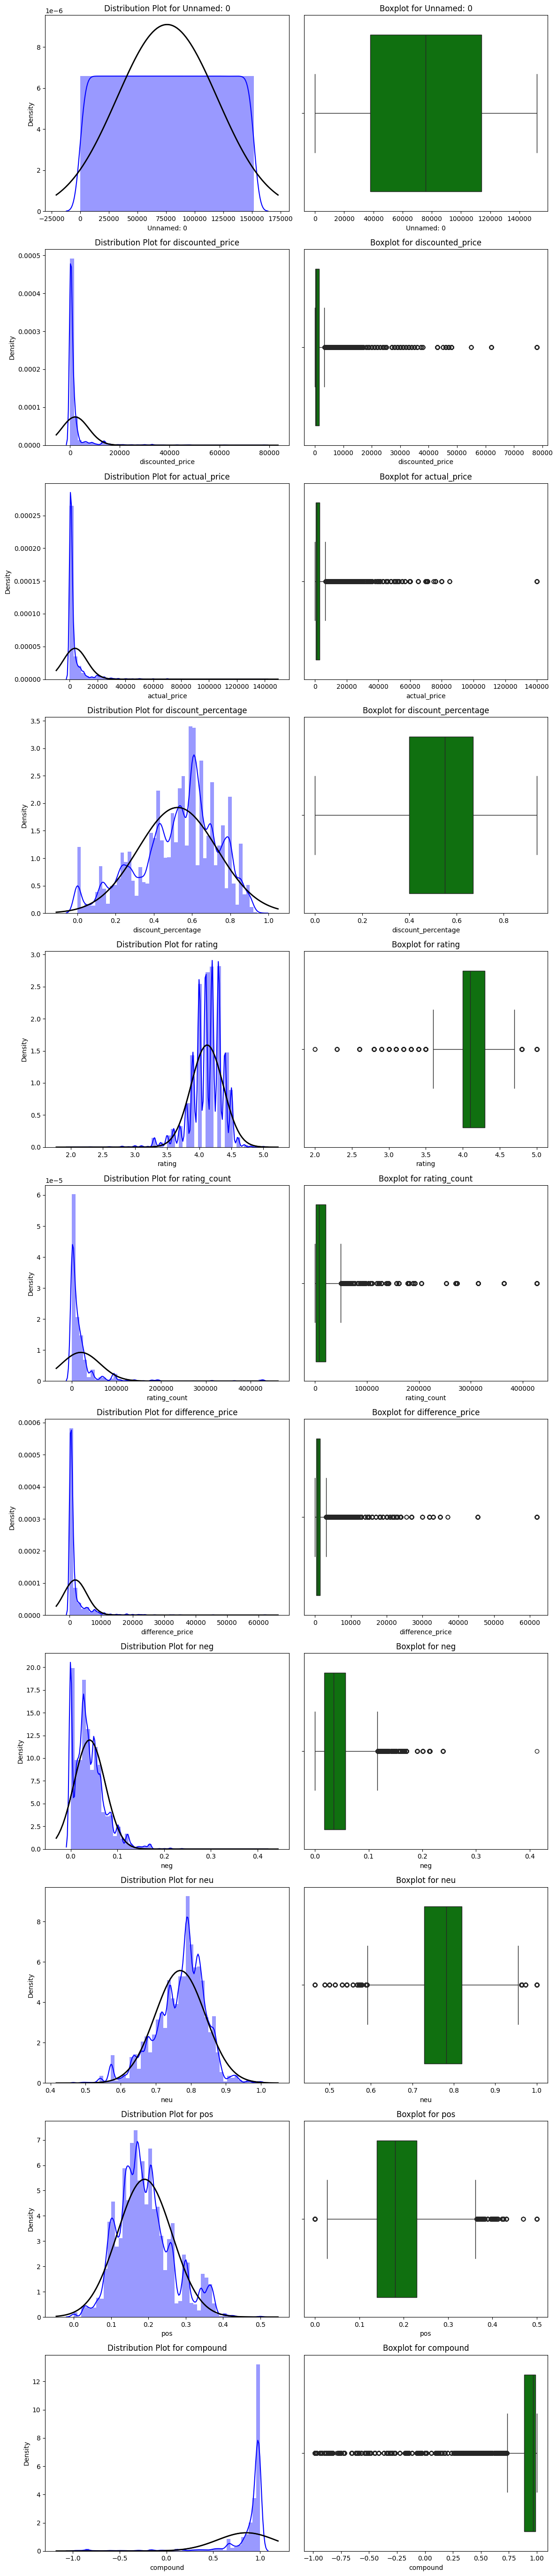

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming num_cols is your DataFrame containing numeric columns

# Set up subplots
fig, axs = plt.subplots(nrows=len(num_cols.columns), ncols=2, figsize=(12, 5 * len(num_cols.columns)))

for i, col in enumerate(num_cols.columns):
    # Distribution Plot
    sns.distplot(num_cols[col], hist=True, kde=True, color='blue', fit=norm, ax=axs[i, 0])
    mean, std = norm.fit(num_cols[col])
    xmin, xmax = axs[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    axs[i, 0].plot(x, p, 'k', linewidth=2)
    axs[i, 0].set_title(f'Distribution Plot for {col}')

    # Boxplot
    sns.boxplot(x=num_cols[col], color='green', ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot for {col}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<Axes: >

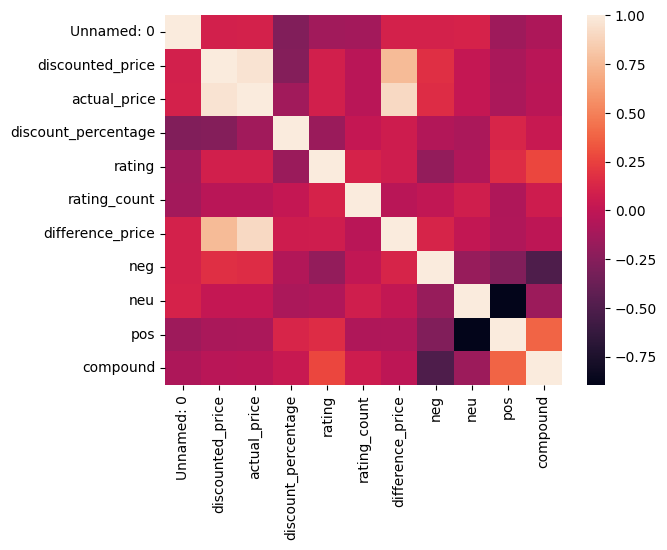

In [46]:
sns.heatmap(num_cols.corr())

- Data transformation & model train all we will do in the modular coding directly in src complonenst folder 

# see u there bimal-ts 

# *************************************************************************************************************